# Proje Tanıtımı
---

## Canlı Demo

🎯 **Projede geliştirilen böbrek taşı tahmin modeline aşağıdaki linkten canlı olarak ulaşabilirsiniz:**

👉 [Böbrek Taşı Tahmini Uygulaması (Hugging Face Spaces)](https://huggingface.co/spaces/HarunDemircioglu11/Bobrek_Tasi_Tespit)

Kendi verilerinizi girerek modelin tahminini anında görebilirsiniz!

---

 Kaggle Playground Series 2023: Böbrek Taşı Tahmini (Binary Classification)

## Proje Amacı

Bu proje, **Kaggle Playground Series 2023: Tabular Tuesday** kapsamında sunulan *synthetically-generated* (sentetik olarak üretilmiş) veri setleriyle makine öğrenmesi ve veri bilimi yeteneklerini geliştirmeye yönelik hazırlanmıştır.

### Hedef ve Kapsam

- Katılımcıların **idrar analizine ait verileri inceleyerek**, bireylerde böbrek taşı olup olmadığını **ikili sınıflandırma (binary classification)** ile tahmin etmesi amaçlanmaktadır.
- Kullanılan veri seti, gerçek dünyadan türetilmiş, istatistiksel olarak benzer, fakat gizlilik nedeniyle sentetik olarak oluşturulmuş tabular (tablo şeklinde) verilerdir.
- Proje boyunca veri ön işleme, öznitelik mühendisliği, model seçimi, model değerlendirme ve sonuçların görselleştirilmesi adımları uygulanacaktır.
## Veri Seti Açıklaması

Aşağıdaki tablo, idrar analizi ile böbrek taşı olup olmadığını tahmin etmek için kullanılan verilerin örnek satırlarını ve sütun isimlerini göstermektedir:

| id | gravity | ph   | osmo | cond | urea | calc | target |
|----|---------|------|------|------|------|------|--------|
| 0  | 1.013   | 6.19 | 443  | 14.8 | 124  | 1.45 | 0      |
| 1  | 1.025   | 5.40 | 703  | 23.6 | 394  | 4.18 | 0      |
| 2  | 1.009   | 6.13 | 371  | 24.5 | 159  | 9.04 | 0      |
| 3  | 1.021   | 4.91 | 442  | 20.8 | 398  | 6.63 | 1      |
| 4  | 1.021   | 5.53 | 874  | 17.8 | 385  | 2.21 | 1      |

### Sütun Açıklamaları

- **id**: Her bir gözlem (satır) için benzersiz kimlik numarası.
- **gravity**: İdrar spesifik gravitesi (Yoğunluk)  
  *Böbreklerin idrarı ne kadar yoğunlaştırabildiğini gösterir.*
- **ph**: İdrarın pH değeri  
  *İdrarın asidik veya bazik özelliğini belirtir.*
- **osmo**: İdrar osmolalitesi  
  *İdrarın konsantrasyonunun bir ölçüsüdür; çözünen madde miktarını gösterir.*
- **cond**: İdrar iletkenliği  
  *İdrarda bulunan iyonların miktarına bağlı olarak, idrarın elektriksel iletkenliği.*
- **urea**: İdrardaki üre konsantrasyonu  
  *Vücudun protein yıkımı sonucu oluşan atık madde miktarı.*
- **calc**: İdrardaki kalsiyum konsantrasyonu  
  *Böbrek taşı oluşumu için önemli bir risk faktörü olabilir.*
- **target**: Hedef değişken (etiket)  
  *0 = Böbrek taşı yok  
  1 = Böbrek taşı var*

---

Bu özellikler kullanılarak, bireylerde böbrek taşı oluşumunu tahmin eden bir makine öğrenmesi modeli oluşturulacaktır.


<img src='https://madicanacdnstorage.blob.core.windows.net/main/Assets/photo/r/bobrek-tasi-56872_b.jpg' width=500>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_csv('train.csv')

In [11]:
df.head()

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1


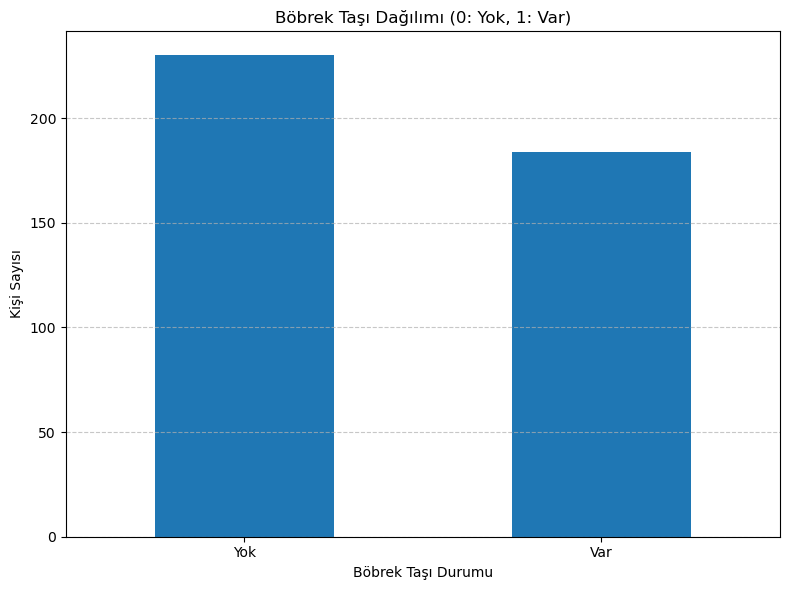

In [14]:
plt.figure(figsize=(8, 6))
df['target'].value_counts().plot(kind='bar')
plt.title('Böbrek Taşı Dağılımı (0: Yok, 1: Var)')
plt.xlabel('Böbrek Taşı Durumu')
plt.ylabel('Kişi Sayısı')
plt.xticks([0, 1], ['Yok', 'Var'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [16]:
df.describe()

,id,gravity,ph,osmo,cond,urea,calc,target
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,206.500000,1.017894,5.955459,651.545894,21.437923,278.657005,4.114638,0.444444
std,119.655756,0.006675,0.642260,234.676567,7.514750,136.442249,3.217641,0.497505
min,0.000000,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,103.250000,1.012000,5.530000,455.250000,15.500000,170.000000,1.450000,0.000000
50%,206.500000,1.018000,5.740000,679.500000,22.200000,277.000000,3.130000,0.000000
75%,309.750000,1.022000,6.280000,840.000000,27.600000,385.000000,6.630000,1.000000
max,413.000000,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


<Figure size 600x400 with 0 Axes>

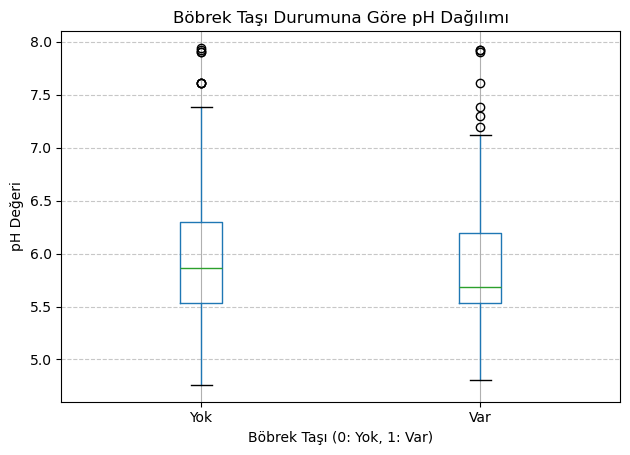

In [18]:
plt.figure(figsize=(6, 4))
df.boxplot(column='ph', by='target')
plt.title('Böbrek Taşı Durumuna Göre pH Dağılımı')
plt.suptitle('')
plt.xlabel('Böbrek Taşı (0: Yok, 1: Var)')
plt.ylabel('pH Değeri')
plt.xticks([1, 2], ['Yok', 'Var'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB


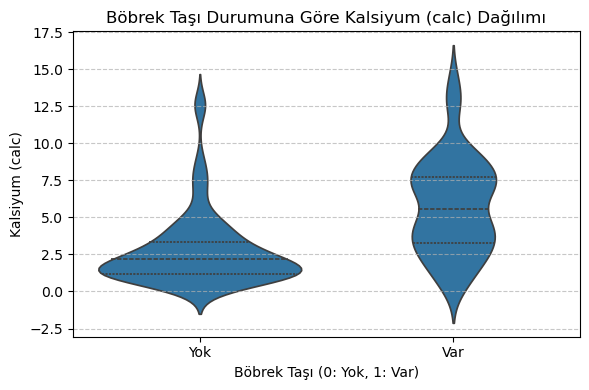

In [22]:
plt.figure(figsize=(6, 4))
sns.violinplot(x='target', y='calc', data=df, inner='quartile')
plt.title('Böbrek Taşı Durumuna Göre Kalsiyum (calc) Dağılımı')
plt.xlabel('Böbrek Taşı (0: Yok, 1: Var)')
plt.ylabel('Kalsiyum (calc)')
plt.xticks([0, 1], ['Yok', 'Var'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [26]:
df.corr(numeric_only=True)

,id,gravity,ph,osmo,cond,urea,calc,target
id,1.000000,-0.004775,-0.086619,0.008030,0.032843,-0.023822,0.032360,0.018222
gravity,-0.004775,1.000000,-0.290349,0.692317,0.470433,0.631710,0.494304,0.282577
ph,-0.086619,-0.290349,1.000000,-0.309495,-0.190185,-0.279749,-0.214402,-0.094983
osmo,0.008030,0.692317,-0.309495,1.000000,0.708480,0.809880,0.472114,0.244770
cond,0.032843,0.470433,-0.190185,0.708480,1.000000,0.499109,0.330609,0.172224
urea,-0.023822,0.631710,-0.279749,0.809880,0.499109,1.000000,0.489879,0.265211
calc,0.032360,0.494304,-0.214402,0.472114,0.330609,0.489879,1.000000,0.467439
target,0.018222,0.282577,-0.094983,0.244770,0.172224,0.265211,0.467439,1.000000


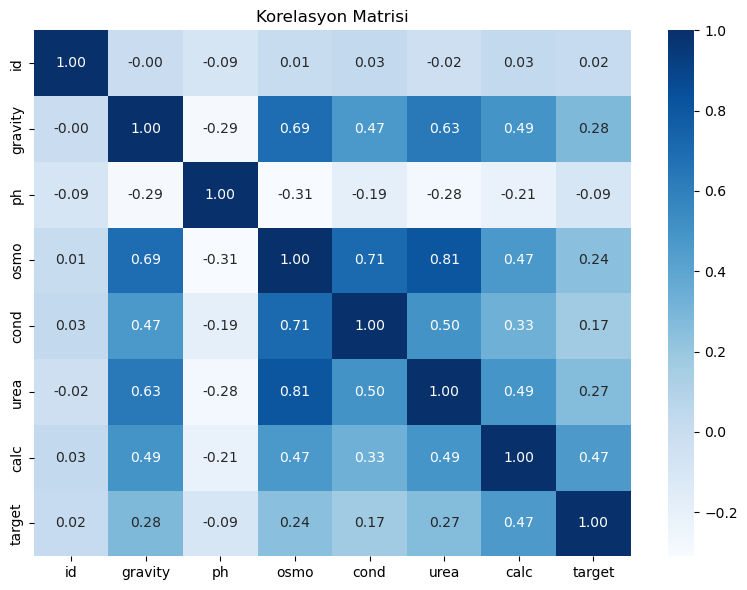

In [24]:
plt.figure(figsize=(8, 6))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues")
plt.title('Korelasyon Matrisi')
plt.tight_layout()
plt.show()

In [28]:
df.shape

(414, 8)

In [30]:
df.isnull().sum()

id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

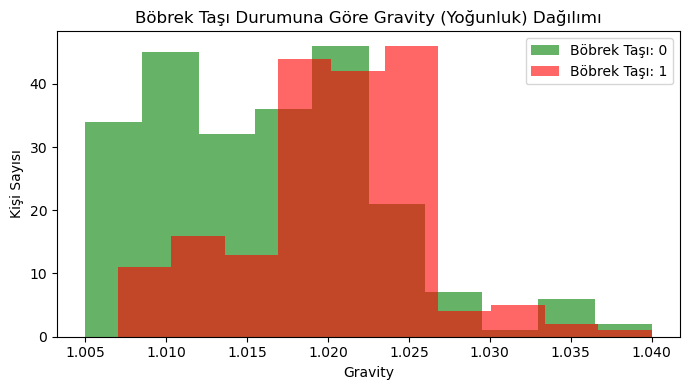

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
for label, color in zip([0, 1], ['green', 'red']):
    subset = df[df['target'] == label]
    plt.hist(subset['gravity'], bins=10, alpha=0.6, label=f'Böbrek Taşı: {label}', color=color)
plt.title('Böbrek Taşı Durumuna Göre Gravity (Yoğunluk) Dağılımı')
plt.xlabel('Gravity')
plt.ylabel('Kişi Sayısı')
plt.legend()
plt.tight_layout()
plt.show()


In [34]:
abs(df.corr(numeric_only=True)['target'].sort_values(ascending=False))

target     1.000000
calc       0.467439
gravity    0.282577
urea       0.265211
osmo       0.244770
cond       0.172224
id         0.018222
ph         0.094983
Name: target, dtype: float64

In [36]:
df.head()

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1


In [38]:
df['risk_score'] = (df['calc'] * df['gravity']) / df['ph']

In [40]:
df['combined_score'] = (df['calc'] * df['urea'] * df['gravity']) / (df['ph'] * df['osmo'])

In [42]:
df.head()

,id,gravity,ph,osmo,cond,urea,calc,target,risk_score,combined_score
0,0,1.013,6.19,443,14.8,124,1.45,0,0.237294,0.066421
1,1,1.025,5.40,703,23.6,394,4.18,0,0.793426,0.444680
2,2,1.009,6.13,371,24.5,159,9.04,0,1.487987,0.637709
3,3,1.021,4.91,442,20.8,398,6.63,1,1.378662,1.241420
4,4,1.021,5.53,874,17.8,385,2.21,1,0.408031,0.179739


In [46]:
abs(df.corr(numeric_only=True)['target'].sort_values(ascending=False))

target            1.000000
calc              0.467439
risk_score        0.456833
combined_score    0.422350
gravity           0.282577
urea              0.265211
osmo              0.244770
cond              0.172224
id                0.018222
ph                0.094983
Name: target, dtype: float64

In [51]:
df.columns

Index(['id', 'gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target',
       'risk_score', 'combined_score'],
      dtype='object')

# Modelling

In [53]:
x=df[['risk_score', 'combined_score','cond', 'urea', 'calc','osmo','gravity']]
y=df['target']

In [55]:
from sklearn.preprocessing import normalize,scale

In [57]:
x=scale(x)

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test=train_test_split(x,y, test_size=.20, random_state=42)
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [89]:
best_model=g.fit(x_train,y_train)

In [67]:
g=GaussianNB()
b=BernoulliNB()

In [91]:
b.fit(x_train,y_train)

BernoulliNB()

In [93]:
gtahmin=g.predict(x_test)

In [95]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [77]:
accuracy_score(y_test,gtahmin)

0.8072289156626506

In [79]:
btahmin=b.predict(x_test)

In [99]:
import pickle

feature_names = [
    'risk_score',
    'combined_score',
    'cond',
    'urea',
    'calc',
    'osmo',
    'gravity'
]

# Diyelim ki modelinin adı best_model (en iyi sonucu veren modelin)
with open('bob1.pkl', 'wb') as file:
    pickle.dump((best_model, feature_names), file)


# Proje Özeti: Böbrek Taşı Sınıflandırması

Bu projede, idrar tahlilinden elde edilen biyokimyasal ve fiziksel veriler kullanılarak, bireylerin **böbrek taşı (kidney stone)** riski olup olmadığı bir makine öğrenmesi modeliyle tahmin edilmektedir.

---

## Amaç

- İdrar analiz verileriyle, böbrek taşı riski taşıyan ve taşımayan bireyleri ayırt edebilen bir sınıflandırma modeli geliştirmek.
- Klinik kararlara destek olabilecek, hızlı ve pratik bir tahmin aracı üretmek.
- Veri bilimi tekniklerini sağlık alanına uygulayarak anlamlı ve öngörücü sonuçlar elde etmek.

---

## Kullanılan Veriler

Her bir gözlem (birey) için veri setinde şu özellikler bulunmaktadır:

- **gravity:** İdrar Yoğunluğu
- **ph:** İdrar pH değeri
- **osmo:** İdrar Osmolalitesi
- **cond:** İdrar İletkenliği
- **urea:** İdrardaki Üre Miktarı
- **calc:** İdrardaki Kalsiyum Miktarı
- **target:** Böbrek Taşı Durumu (0 = Yok, 1 = Var)

Ayrıca, **özellik mühendisliği** (feature engineering) ile böbrek taşı riskiyle ilişkili ek skorlar (ör: `risk_score`, `combined_score`) üretilmiştir.

---

## Yöntem

1. **Veri Analizi ve Temizleme:**  
   Ham veriler incelenmiş, görselleştirilmiş ve eksik değerler kontrol edilmiştir.
2. **Özellik Mühendisliği:**  
   Mevcut değişkenlerden yeni risk skorları türetilmiştir.
3. **Model Eğitimi ve Karşılaştırması:**  
   Farklı sınıflandırma algoritmaları (Logistic Regression, Random Forest, AdaBoost, KNN vb.) denenmiş, en yüksek performans gösteren model seçilmiştir.
4. **Model Değerlendirmesi:**  
   Başarı metrikleri (Accuracy, Precision, Recall, F1-Score) ile model başarısı ölçülmüştür.
5. **Uygulama:**  
   Sonuçta elde edilen model, Streamlit tabanlı bir web uygulaması olarak son kullanıcıya sunulmuştur.

---

## Sonuç

- Eğitilen model, idrar analiz verileriyle **böbrek taşı riski tahmini** yapabilmektedir.
- Geliştirilen arayüz, kullanıcıların kendi değerleriyle kolayca risk tahmini yapmasını sağlar.
- Projede geliştirilen makine öğrenmesi modeli, test verisi üzerinde **%80 doğruluk oranı (accuracy)** ile başarılı bir performans göstermiştir.
- Proje, hem sağlık alanında karar desteği hem de veri bilimi uygulaması olarak değerlendirilebilir.

---

> **Bu proje; idrar analiziyle böbrek taşı riskinin makine öğrenmesi ile öngörülebileceğini pratik olarak göstermektedir.**


---

## Canlı Demo

🎯 **Projede geliştirilen böbrek taşı tahmin modeline aşağıdaki linkten canlı olarak ulaşabilirsiniz:**

👉 [Böbrek Taşı Tahmini Uygulaması (Hugging Face Spaces)](https://huggingface.co/spaces/HarunDemircioglu11/Bobrek_Tasi_Tespit)

Kendi verilerinizi girerek modelin tahminini anında görebilirsiniz!

---
